# Greenhouse Gas (GHGs) Emissions, including Indirect CO2, without LULUCF, in kilotonne CO2 equivalent 

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['font.size'] = 12
path = os.getcwd()                                  # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join(path, 'datasets', 'Greenhouse Gas (GHGs) Emissions, including Indirect CO2, without LULUCF, in kilotonne CO2 equivalent.csv')

df = pd.read_csv(filepath)

# Head and Tail

In [4]:
df

,Country or Area,Year,Value
0,Cyprus,2019,8849.599227
1,Cyprus,2018,8819.216843
2,Cyprus,2017,8977.184007
3,Cyprus,2016,8790.713755
4,Cyprus,2015,8343.354184
...,...,...,...
325,Switzerland,1994,52075.390168
326,Switzerland,1993,53094.848180
327,Switzerland,1992,55674.500211
328,Switzerland,1991,55934.033481


In [5]:
df.shape

(330, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  330 non-null    object 
 1   Year             330 non-null    int64  
 2   Value            330 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.9+ KB


In [7]:
df.rename(columns={'Country or Area': 'Country_or_Area', 
                   'Value': 'CO2 emissions (kt)'}, inplace=True) 
df.head() 

,Country_or_Area,Year,CO2 emissions (kt)
0,Cyprus,2019,8849.599227
1,Cyprus,2018,8819.216843
2,Cyprus,2017,8977.184007
3,Cyprus,2016,8790.713755
4,Cyprus,2015,8343.354184


In [8]:
df['Country_or_Area'].value_counts()

Cyprus            30
Czechia           30
Denmark           30
European Union    30
Finland           30
Japan             30
Latvia            30
Netherlands       30
Portugal          30
Slovakia          30
Switzerland       30
Name: Country_or_Area, dtype: int64

In [9]:
df['Year'].value_counts()

2019    11
2018    11
1991    11
1992    11
1993    11
1994    11
1995    11
1996    11
1997    11
1998    11
1999    11
2000    11
2001    11
2002    11
2003    11
2004    11
2005    11
2006    11
2007    11
2008    11
2009    11
2010    11
2011    11
2012    11
2013    11
2014    11
2015    11
2016    11
2017    11
1990    11
Name: Year, dtype: int64

In [10]:
df['Year'].describe()

count     330.000000
mean     2004.500000
std         8.668586
min      1990.000000
25%      1997.000000
50%      2004.500000
75%      2012.000000
max      2019.000000
Name: Year, dtype: float64

# Missing Values Exploration

In [11]:
df.isna().sum()

Country_or_Area       0
Year                  0
CO2 emissions (kt)    0
dtype: int64

# Grouping and Aggregation

In [12]:
country_area_grouped = df.groupby('Country_or_Area')
country_area_grouped.head(10)

,Country_or_Area,Year,CO2 emissions (kt)
0,Cyprus,2019,8849.599227
1,Cyprus,2018,8819.216843
2,Cyprus,2017,8977.184007
3,Cyprus,2016,8790.713755
4,Cyprus,2015,8343.354184
...,...,...,...
305,Switzerland,2014,49005.549839
306,Switzerland,2013,52965.077319
307,Switzerland,2012,52084.458804
308,Switzerland,2011,50747.195704


In [13]:
agg_emiss_stats = country_area_grouped.agg(
    agg_min = pd.NamedAgg('CO2 emissions (kt)', np.min),
    agg_mean = pd.NamedAgg('CO2 emissions (kt)', np.mean),
    agg_max = pd.NamedAgg('CO2 emissions (kt)', np.max),
    agg_total = pd.NamedAgg('CO2 emissions (kt)', np.sum)
)

agg_emiss_stats

,agg_min,agg_mean,agg_max,agg_total
Country_or_Area,,,,
Cyprus,5.577476e+03,8.273690e+03,1.001710e+04,2.482107e+05
Czechia,1.232976e+05,1.480542e+05,1.989493e+05,4.441626e+06
Denmark,4.608218e+04,6.882955e+04,9.307111e+04,2.064886e+06
European Union,4.059228e+06,4.967389e+06,5.662307e+06,1.490217e+08
Finland,5.307246e+04,6.972750e+04,8.563545e+04,2.091825e+06
Japan,1.211552e+06,1.337538e+06,1.408191e+06,4.012614e+07
Latvia,1.008415e+04,1.257752e+04,2.590869e+04,3.773255e+05
Netherlands,1.808724e+05,2.115337e+05,2.410505e+05,6.346010e+06
Portugal,5.887182e+04,7.157866e+04,8.591692e+04,2.147360e+06


In [14]:
agg_emiss_stats['agg_total'].sort_values(ascending=False).head(10)          # top ten country or area with the highest GHG's emissions

Country_or_Area
European Union    1.490217e+08
Japan             4.012614e+07
Netherlands       6.346010e+06
Czechia           4.441626e+06
Portugal          2.147360e+06
Finland           2.091825e+06
Denmark           2.064886e+06
Switzerland       1.577581e+06
Slovakia          1.477427e+06
Latvia            3.773255e+05
Name: agg_total, dtype: float64

[Text(0.5, 0, 'CO2 emissions (kt)'),
 Text(0, 0.5, 'Country or Area'),
 Text(0.5, 1.0, 'Greenhouse Gas (GHGs) Emissions in kilotonne CO2 equivalent')]

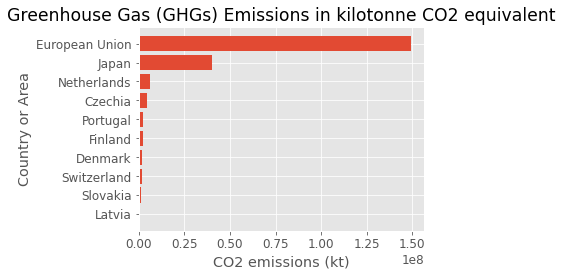

In [15]:
top_10_emiss = agg_emiss_stats['agg_total'].sort_values(ascending=False).head(10) 

fig, ax = plt.subplots()

hbars = ax.barh(top_10_emiss.keys(), top_10_emiss.values, align='center')
ax.invert_yaxis()                                                                                # labels read top-to-bottom
ax.set(xlabel='CO2 emissions (kt)', ylabel='Country or Area', title='Greenhouse Gas (GHGs) Emissions in kilotonne CO2 equivalent')

In [16]:
agg_emiss_stats['agg_total'].sort_values(ascending=True).head(10)          # top ten country or area with the lowest GHG's emissions

Country_or_Area
Cyprus         2.482107e+05
Latvia         3.773255e+05
Slovakia       1.477427e+06
Switzerland    1.577581e+06
Denmark        2.064886e+06
Finland        2.091825e+06
Portugal       2.147360e+06
Czechia        4.441626e+06
Netherlands    6.346010e+06
Japan          4.012614e+07
Name: agg_total, dtype: float64

[Text(0.5, 0, 'CO2 emissions (kt)'),
 Text(0, 0.5, 'Country or Area'),
 Text(0.5, 1.0, 'Greenhouse Gas (GHGs) Emissions in kilotonne CO2 equivalent')]

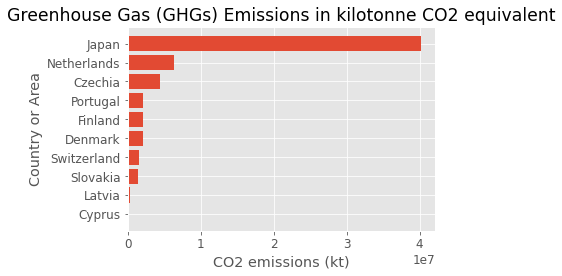

In [17]:
low_10_emiss = agg_emiss_stats['agg_total'].sort_values(ascending=True).head(10) 

fig, ax = plt.subplots()

hbars = ax.barh(low_10_emiss.keys(), low_10_emiss.values, align='center')
ax.set(xlabel='CO2 emissions (kt)', ylabel='Country or Area', title='Greenhouse Gas (GHGs) Emissions in kilotonne CO2 equivalent')